In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();

plt.rcParams['figure.figsize'] = 20, 10
plt.style.use('dark_background')
plt.rcParams['axes.grid'] = False

In [3]:
df = pd.read_pickle('./data/scraped_data')

In [11]:
pd.options.display.max_rows = 100

## Cleaning

In [12]:
df.review = df.review.astype(np.float32)

# 

In [13]:
extracted = df.votes.str.extract(r"([0-9,]+)")

AttributeError: Can only use .str accessor with string values!

In [ ]:
extracted = extracted[0].str.replace(",", '')

In [ ]:
df.votes = extracted.astype(float)

# 

In [ ]:
df.university = df.university.str.strip()
df.course = df.course.str.strip()
df.type = df.type.str.strip()
df.studets = df.studets.str.strip()
df.difficulty = df.difficulty.str.strip()

In [ ]:
df[df.studets.str.len() == 2]

In [ ]:
_ = df.studets.str.extract(r"([0-9.]+)"

In [ ]:
_ = _.stack().droplevel(1)

In [ ]:
_ = _.rename("students")

In [ ]:
__ = df.studets.str[-1]

In [ ]:
get_counts = pd.concat([_, __.rename("unit")], axis = 1 )
get_counts

In [ ]:
get_counts.students = get_counts.students.astype(np.float)

In [ ]:
def get_it_done(ser):
    to_mul = 1000 if ser[1] == 'k' else 10_00_000
    return ser[0] * to_mul

In [ ]:
df.studets = get_counts[['students', 'unit']].apply(get_it_done, axis= 1)

In [ ]:
df

# Now it looks cool.

# 

# <center> Simple Questions </center>

### #configurations

In [18]:
from matplotlib import cm

def get_color_spectrum(start, end, n, flipped= False):
    if flipped:
        return cm.inferno_r(np.linspace(start, end, n))[::-1]
    return cm.inferno_r(np.linspace(start, end, n))

In [19]:
def plot_bar_values(plot, values, xoffset= 1, yoffset= 0.2, type_ = 'v', fontdict= None, **kwargs):
    '''Parameters:
    --------------
    • plot: 
    x = plt.plot()
    Then `x` becomes the `plot`
    
    • values: series.values
    
    • xoffset, yoffset - Self explanatory
    
    • type_: This should be 'h' or 'v' depending on the type of your plot.
    '''
    for patch, val in zip(plot.patches, values):
        x = patch.get_width() if type_ == 'h' else patch.get_x()
        y = patch.get_y() if type_ == 'h' else patch.get_height()
        plt.text(x + xoffset, y + yoffset, str(val), fontdict= fontdict, **kwargs)

# 

## Q1. Which university is providing most of the courses?

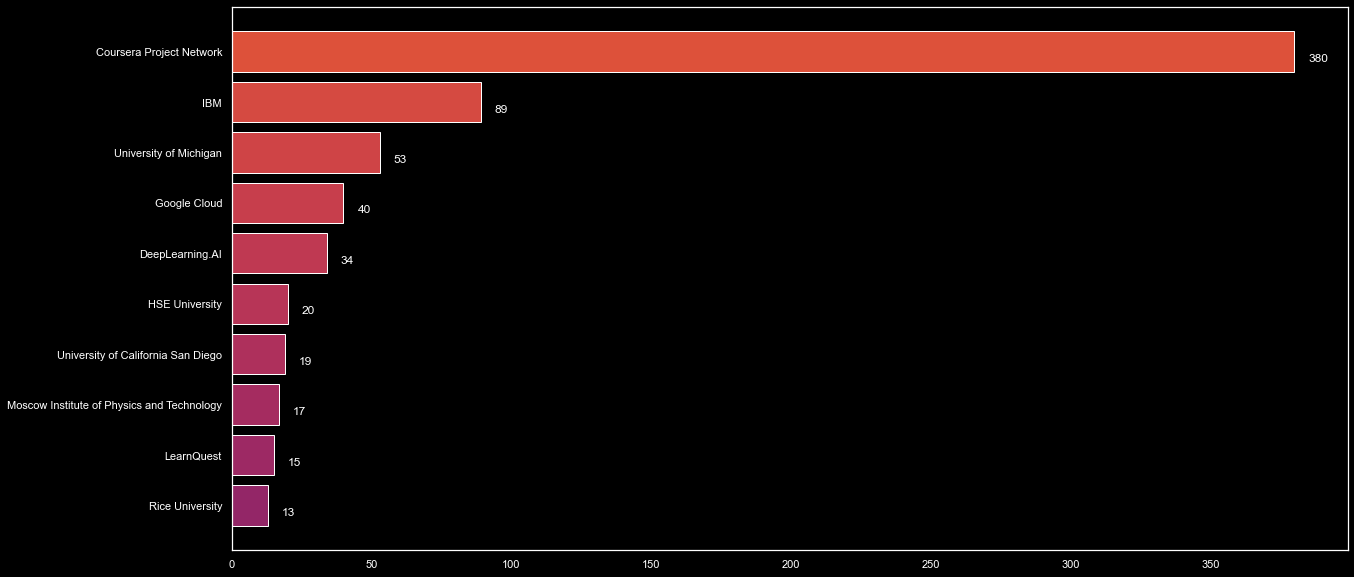

In [43]:
topUni = df.university.value_counts()[:10][::-1]
plot = plt.barh(topUni.index, topUni.values, color= get_color_spectrum(.4, .6, 10, flipped= True))
plot_bar_values(plot, topUni.values, type_= 'h', xoffset= 5)

Here we can see that for the most of the cases, we are having **Courrsera Project Network** as a leading source of the program in the field of python. But, when I tried to look at - Coursera project network provides the "GUIDED PROJECT". Which is a type of the program. If we are just interested in the courses like specialization and certifications, then this graph is helpful.

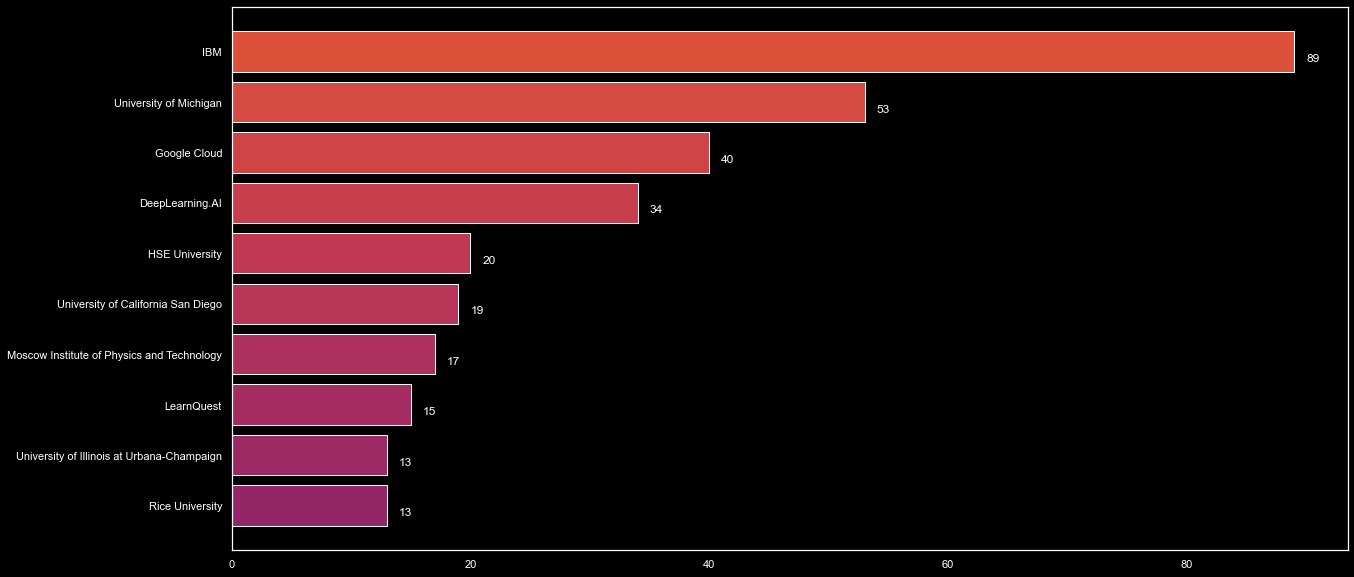

In [44]:
topUni = df[df.type != 'GUIDED PROJECT'].university.value_counts()[:10][::-1]
plot = plt.barh(topUni.index, topUni.values, color= get_color_spectrum(.4, .6, 10, flipped= True))
plot_bar_values(plot, topUni.values, type_= 'h')

# 

## Q2. How courses are divided (according to their type)?

In [45]:
courseType = df.type.value_counts()

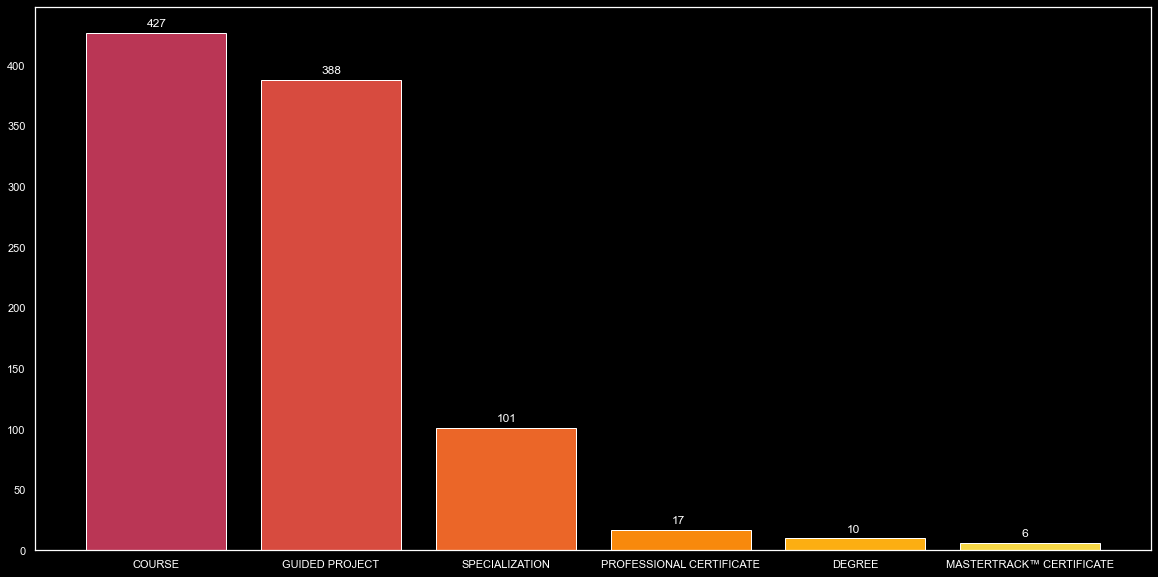

In [46]:
plot = plt.bar(courseType.index, courseType.values, color= get_color_spectrum(.1, .5, len(courseType), flipped= True))
plot_bar_values(plot, courseType.values, xoffset= 0.35, yoffset= 5)

So, yea - coursera offers various 'COURSES' on python. The specialization seems to be on the third.<br>
Let's see which university from top10 offers what.

In [47]:
topUni.index[:-1]

Index(['Rice University', 'University of Illinois at Urbana-Champaign',
       'LearnQuest', 'Moscow Institute of Physics and Technology',
       'University of California San Diego', 'HSE University',
       'DeepLearning.AI', 'Google Cloud', 'University of Michigan'],
      dtype='object')

In [48]:
topUniDF = df[df.university.isin(topUni.index[:-1])]

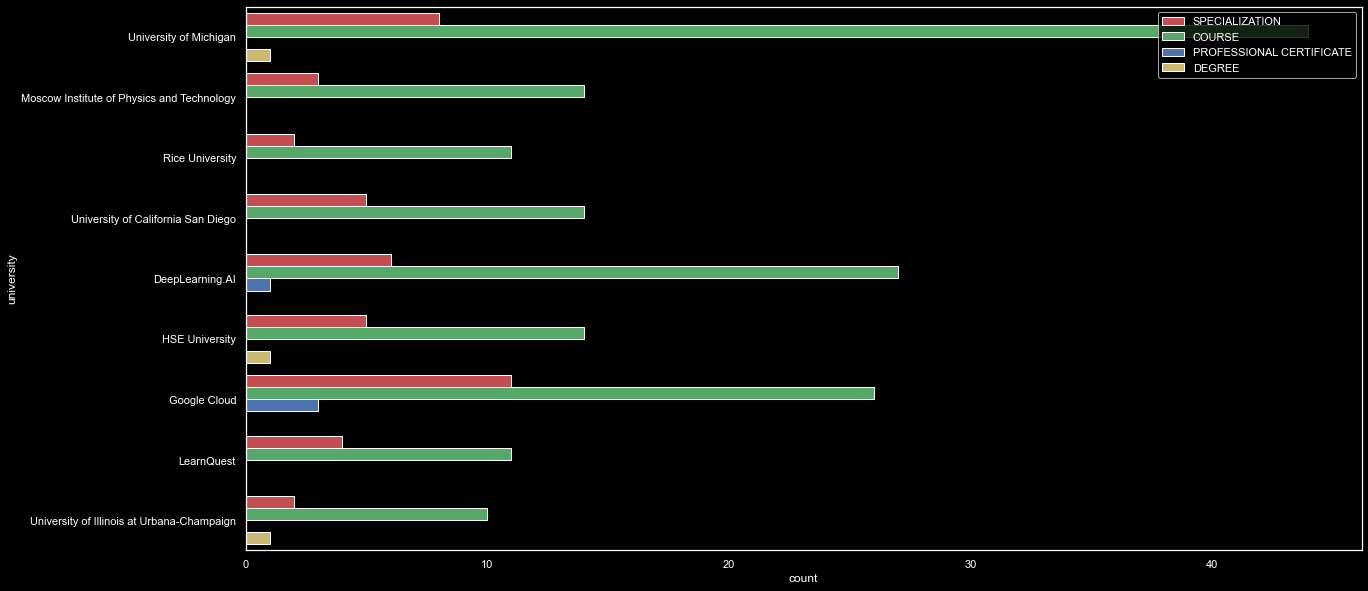

In [49]:
sns.countplot(y= 'university', data= topUniDF, hue= 'type', palette= ['r', 'g', 'b', 'y'], saturation= 1)
plt.legend(loc= 1)

Looking at the data, we can see that - only two universities 'HSE Uni' and 'Uni of Michigan' provides Degrees on python. And most of the universities focuses more on the COURSES.

### What about bottom 10 universities?

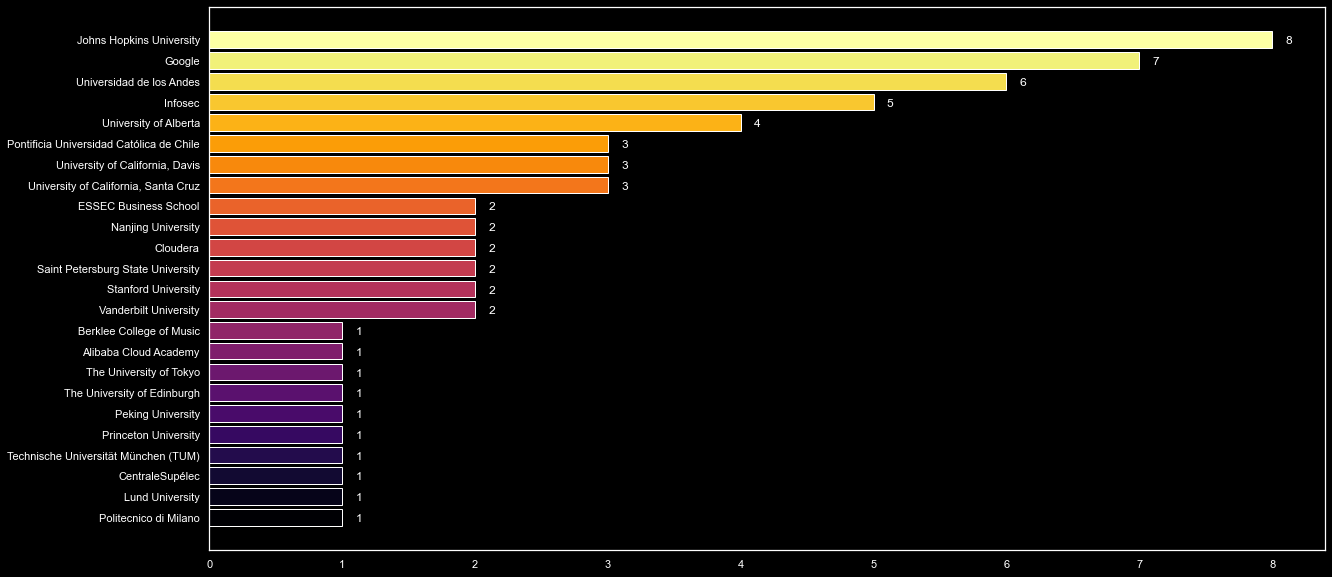

In [50]:
bottomUni = df[df.type != 'GUIDED PROJECT'].university.value_counts()[-70::3][::-1]
plot = plt.barh(bottomUni.index, bottomUni.values, color= get_color_spectrum(0, 1, 70//3 + 1, flipped= True))
plot_bar_values(plot, bottomUni.values, type_= 'h', xoffset= 0.1)

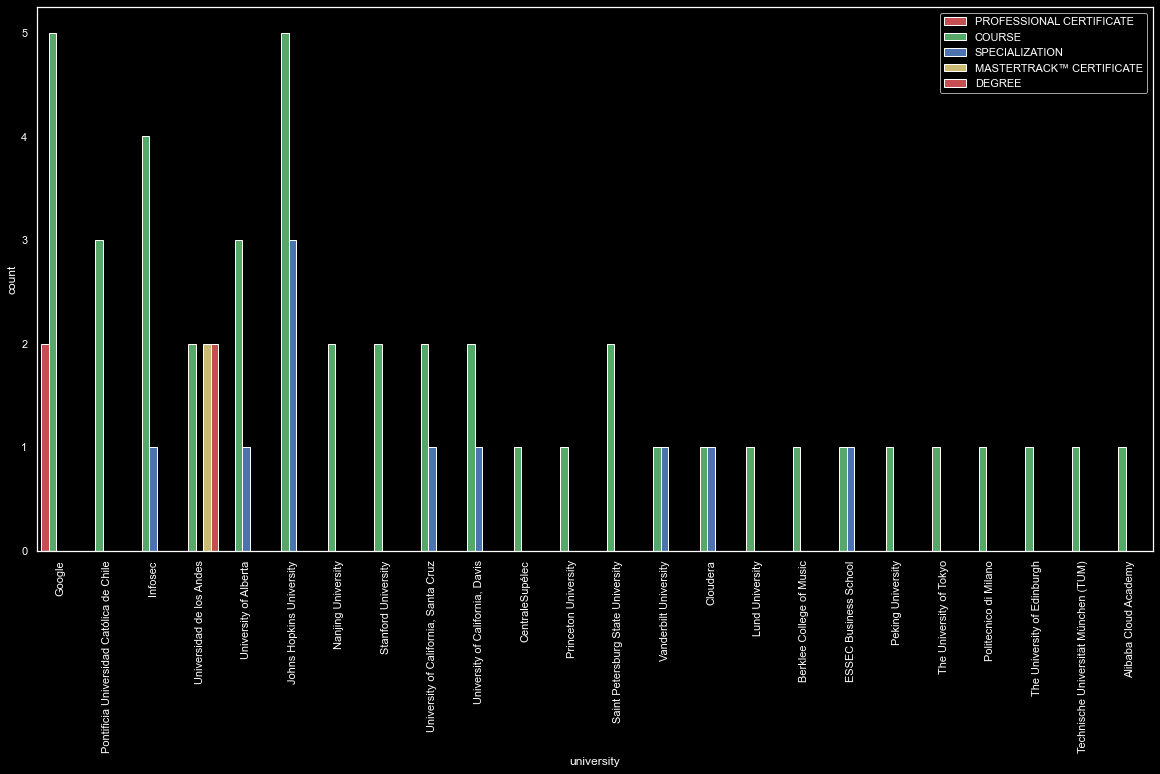

In [51]:
bottomUniDF = df[df.university.isin(bottomUni.index)]
sns.countplot(x= 'university', data= bottomUniDF, hue= 'type', palette= ['r', 'g', 'b', 'y'], saturation= 1)
plt.xticks(rotation= 90)
plt.legend(loc= 1)

Not much to get.

# 

# Q3. Universities ranked by their number of votes.

In [52]:
uniRanked = df.groupby("university")[['review', 'votes']].agg({"review": "mean", "votes": "sum"}).sort_values(by= "votes", ascending= False)
uniRanked.dropna(inplace= True)
uniRanked

,review,votes
university,,
University of Michigan,4.676471,692821.0
IBM,4.550746,457835.0
DeepLearning.AI,4.707143,420828.0
Google Cloud,4.525641,168384.0
Stanford University,4.850000,164765.0
...,...,...
Tsinghua University,2.600000,33.0
École Polytechnique,4.900000,31.0
Infosec,4.600000,29.0


In [53]:
topRankers = uniRanked[:10]
bottomRankers = uniRanked[-10:]

In [54]:
both = pd.concat([topRankers, bottomRankers])[::-1]
both

,review,votes
university,,
SAS,4.500000,11.0
Technical University of Denmark (DTU),4.800000,28.0
Infosec,4.600000,29.0
École Polytechnique,4.900000,31.0
Tsinghua University,2.600000,33.0
The University of Chicago,4.200000,48.0
Lund University,4.700000,51.0
Universitat Autònoma de Barcelona,4.300000,74.0
SberUniversity,4.500000,77.0


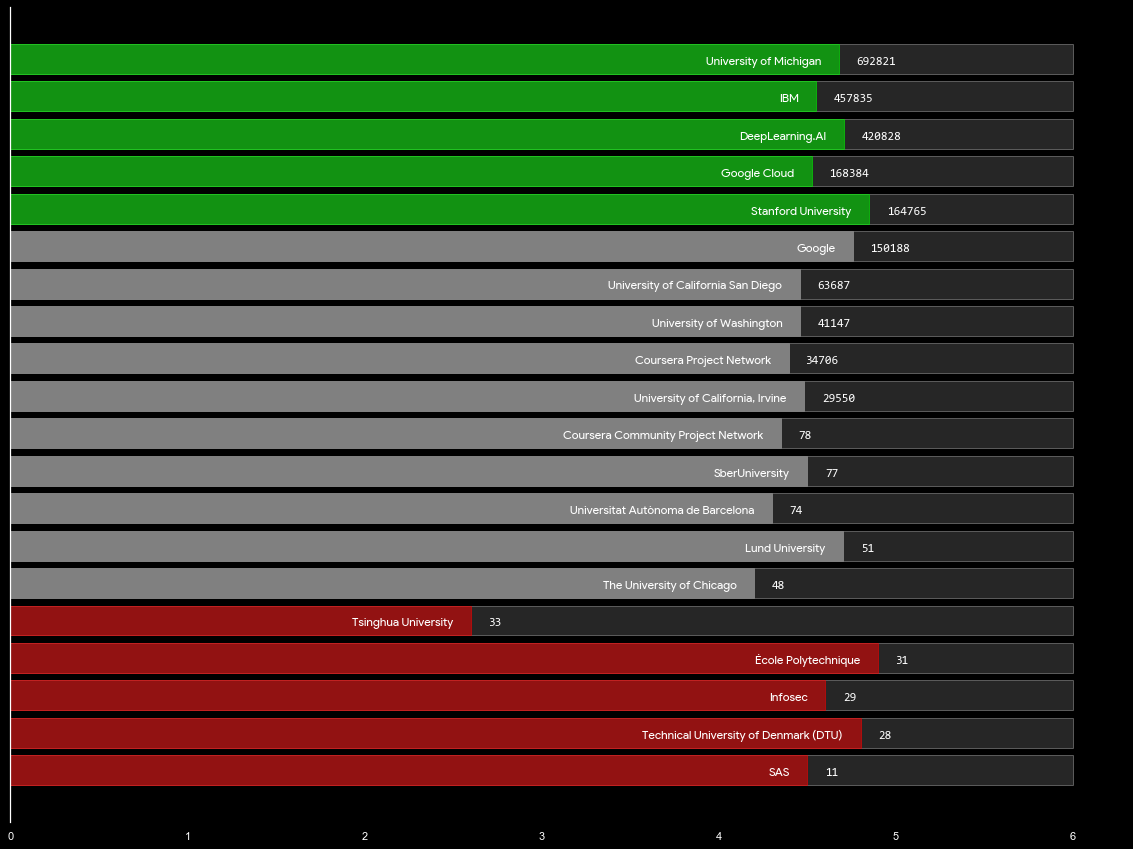

In [55]:
fig, ax = plt.subplots(1, 1, figsize= (20, 15))


ax.barh(both.index, 6, color= 'grey', alpha= 0.3)
ax.barh(both.index, both.review)
ax.set_yticklabels([])
for side in ['right', 'top', 'bottom']:
    ax.spines[side].set_visible(False)
for patch in ax.patches[20:25]:
    patch.set_color((1, 0, 0, 0.5))
for patch in ax.patches[35:]:
    patch.set_color((0, 1, 0, 0.5))
for patch in ax.patches[25:35]:
    patch.set_color("grey")

    
for patch, val, names in zip(ax.patches[20:], both.votes, both.index):
    x = patch.get_width()
    y = patch.get_y()
    ax.text(x + 0.1, y + 0.25, str(int(val)), fontfamily= 'consolas')
    ax.text(x - 0.1, y + 0.25, str(names), ha= 'right', fontfamily= "product sans")
    

# 

# Q4. Which university has most of the students?

In [56]:
df = df.rename({"studets": "students"}, axis= 1)

In [57]:
uniStud = df.groupby("university")['students'].sum().sort_values(ascending= False).round(1)

In [58]:
unis = uniStud[::2]

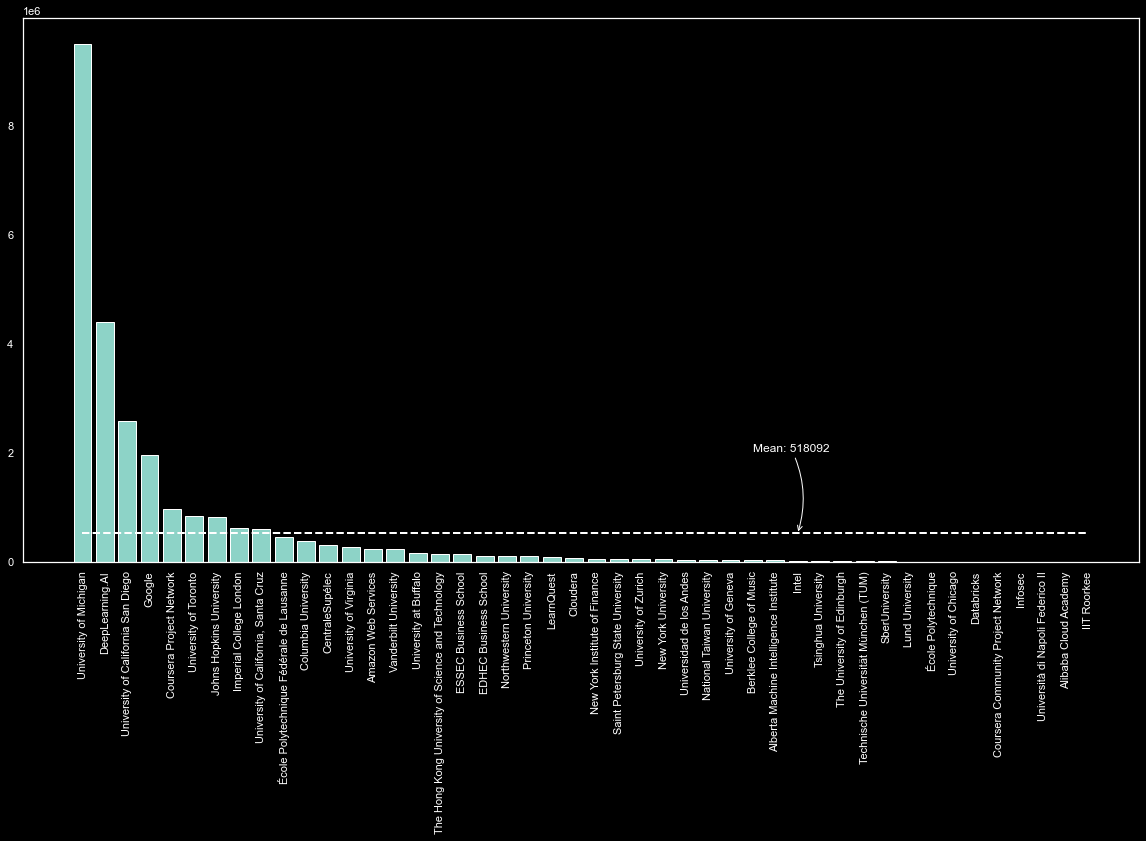

In [59]:
plt.bar(unis.index, unis.values);
plt.xticks(rotation= 90);
plt.hlines(uniStud.mean(), xmin= 0, xmax= uniStud.index[-1], ls= '--', lw= 2)
plt.annotate("Mean: 518092", xy= ("Intel", 518092), xytext= (30, 2018092),
             arrowprops= dict(arrowstyle= "->", connectionstyle= "arc3, rad= -0.2"));

# Q5. Number of courses based on difficulty

Right off the bat, we can say that most of the programs are Intermediate. Which takes `51%` of all the rest levels.

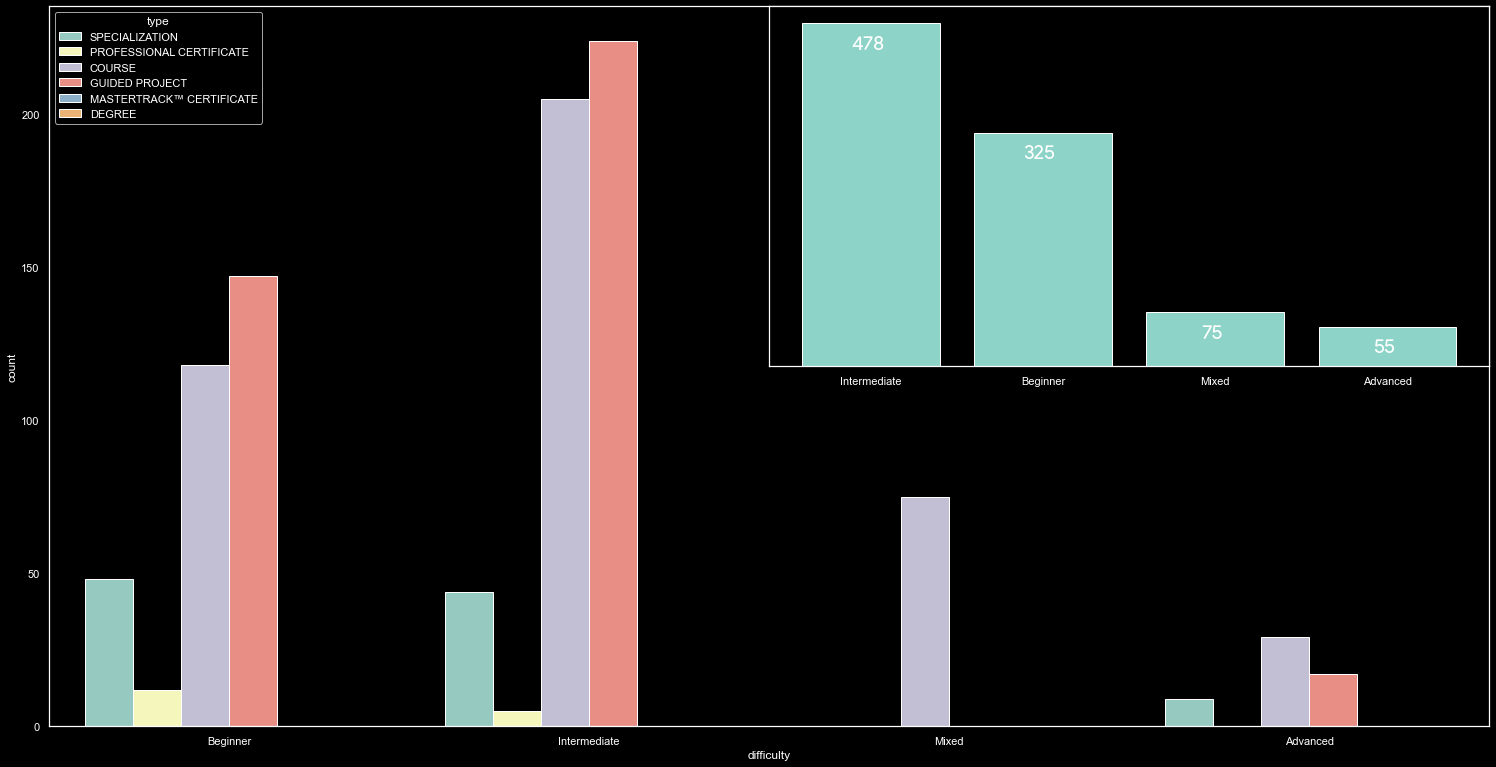

In [60]:
fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax2 = fig.add_axes([1.5,1.5,0.5,0.5])
sns.countplot(x= "difficulty", data= df, hue= 'type', ax = ax)

diff = df.difficulty.value_counts()
plot = ax2.bar(diff.index, diff.values)
ax2.set_yticks([])
plot_bar_values(plot, diff.values, xoffset= 0.38, yoffset= -35, fontdict={"fontfamily": "product sans", "size": 20}, ha= 'center')

# 

# <center> A bit advanced questions </center>

## Q1. How many cources teach AI / ML / DL (Which of course are related with python) ?

In [61]:
import re

In [62]:
pattern = r'(\bA\.?I\.?\b)|(\bM\.?L\.?\b)|(\bD\.?L\.?\b)|(\bN\.?L\.?P\.?\b)(Artificial Intelligence)|(Machine Learning)|(Deep Learning)|(Reinforcement Learning)|(Tensor\s?Flow)|(Natural Language Processing)|(Neural Networks?)'

In [63]:
with_MlAiDl = df[df.course.str.match(pattern, flags= re.IGNORECASE)]

In [64]:
with_MlAiDl

,university,course,type,review,votes,students,difficulty
22,DeepLearning.AI,Deep Learning,SPECIALIZATION,4.8,123216.0,1100000.0,Intermediate
121,Coursera Project Network,Neural Network Visualizer Web App with Python,GUIDED PROJECT,4.5,226.0,6400.0,Intermediate
130,University of Illinois at Urbana-Champaign,Machine Learning for Accounting with Python,COURSE,4.6,25.0,5800.0,Intermediate
162,Coursera Project Network,Machine Learning con Python. Nivel Avanzado,GUIDED PROJECT,NaN,NaN,NaN,Intermediate
242,IBM,Machine Learning with Python,COURSE,4.7,11004.0,210000.0,Intermediate
...,...,...,...,...,...,...,...
893,Coursera Project Network,Machine Learning Pipelines with Azure ML Studio,GUIDED PROJECT,4.6,397.0,16000.0,Beginner
905,IBM,"AI Workflow: Machine Learning, Visual Recognit...",COURSE,4.5,60.0,2600.0,Advanced
912,IBM,Machine Learning Rapid Prototyping with IBM Wa...,COURSE,NaN,NaN,NaN,Intermediate
921,Coursera Project Network,Machine Learning with H2O Flow,GUIDED PROJECT,4.8,97.0,3800.0,Intermediate


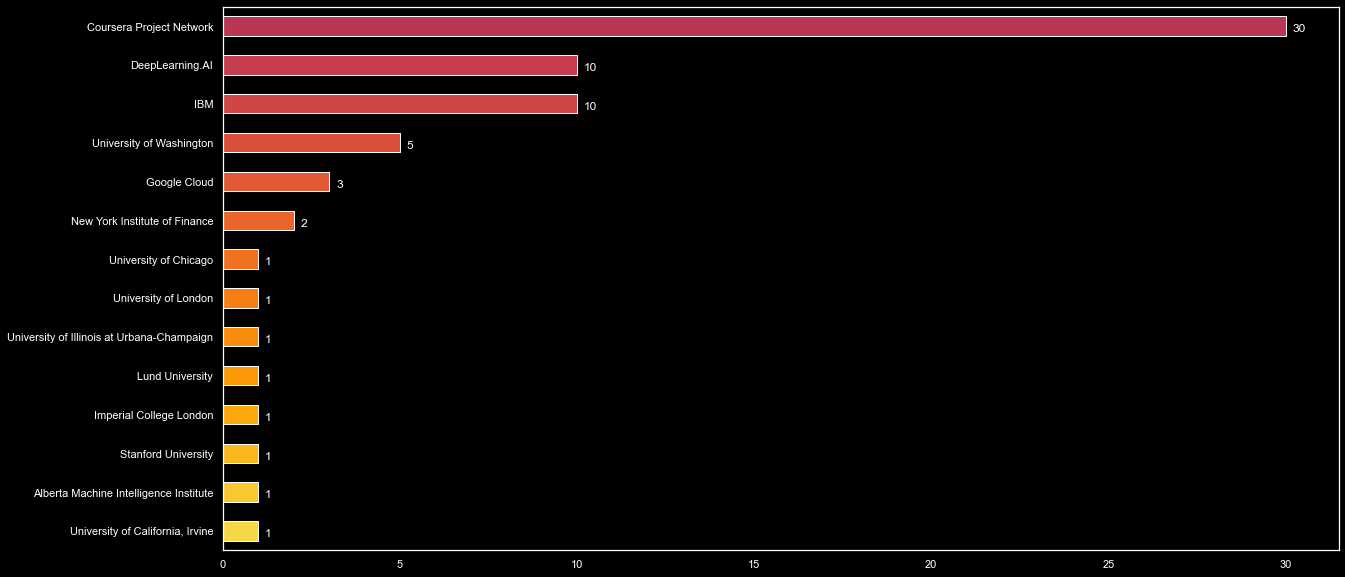

In [65]:
plot = with_MlAiDl.university.value_counts()[::-1].plot(kind= 'barh', color= get_color_spectrum(0.1, 0.5, 14))
plot_bar_values(plot, with_MlAiDl.university.value_counts()[::-1].values, type_= 'h', xoffset= 0.2, yoffset= 0.1)

# 

## Q2. Plot pie chart of those top 5 universities which give the programs on AI/ML/DL and show the distribution of their students with rest of their courses

In [66]:
top5_AI = with_MlAiDl.university.value_counts().index[:5]
top5_AI

Index(['Coursera Project Network', 'DeepLearning.AI', 'IBM',
       'University of Washington', 'Google Cloud'],
      dtype='object')

In [67]:
top5_AI_DF = with_MlAiDl[with_MlAiDl.university.isin(top5_AI)]

In [68]:
top5_other_DF = df[df.university.isin(top5_AI) & ~(df.index.isin(top5_AI_DF.index))]

In [69]:
top5_AI_DF.groupby("university")['students'].sum()

university
Coursera Project Network      61200.0
DeepLearning.AI             2469000.0
Google Cloud                 121700.0
IBM                          236600.0
University of Washington    1084000.0
Name: students, dtype: float64

In [70]:
top5_other_DF.groupby("university")['students'].sum()

university
Coursera Project Network     910900.0
DeepLearning.AI             1934600.0
Google Cloud                2301600.0
IBM                         6122900.0
University of Washington     259200.0
Name: students, dtype: float64

In [71]:
AI_vs_REST = pd.DataFrame({"AI": top5_AI_DF.groupby("university")['students'].sum(), "REST": top5_other_DF.groupby("university")['students'].sum()})
AI_vs_REST

,AI,REST
university,,
Coursera Project Network,61200.0,910900.0
DeepLearning.AI,2469000.0,1934600.0
Google Cloud,121700.0,2301600.0
IBM,236600.0,6122900.0
University of Washington,1084000.0,259200.0


In [72]:
patches, _, __ = ax.pie(AI_vs_REST.iloc[0], colors= get_color_spectrum(.6, .8, 2), autopct= "%.2f%%")

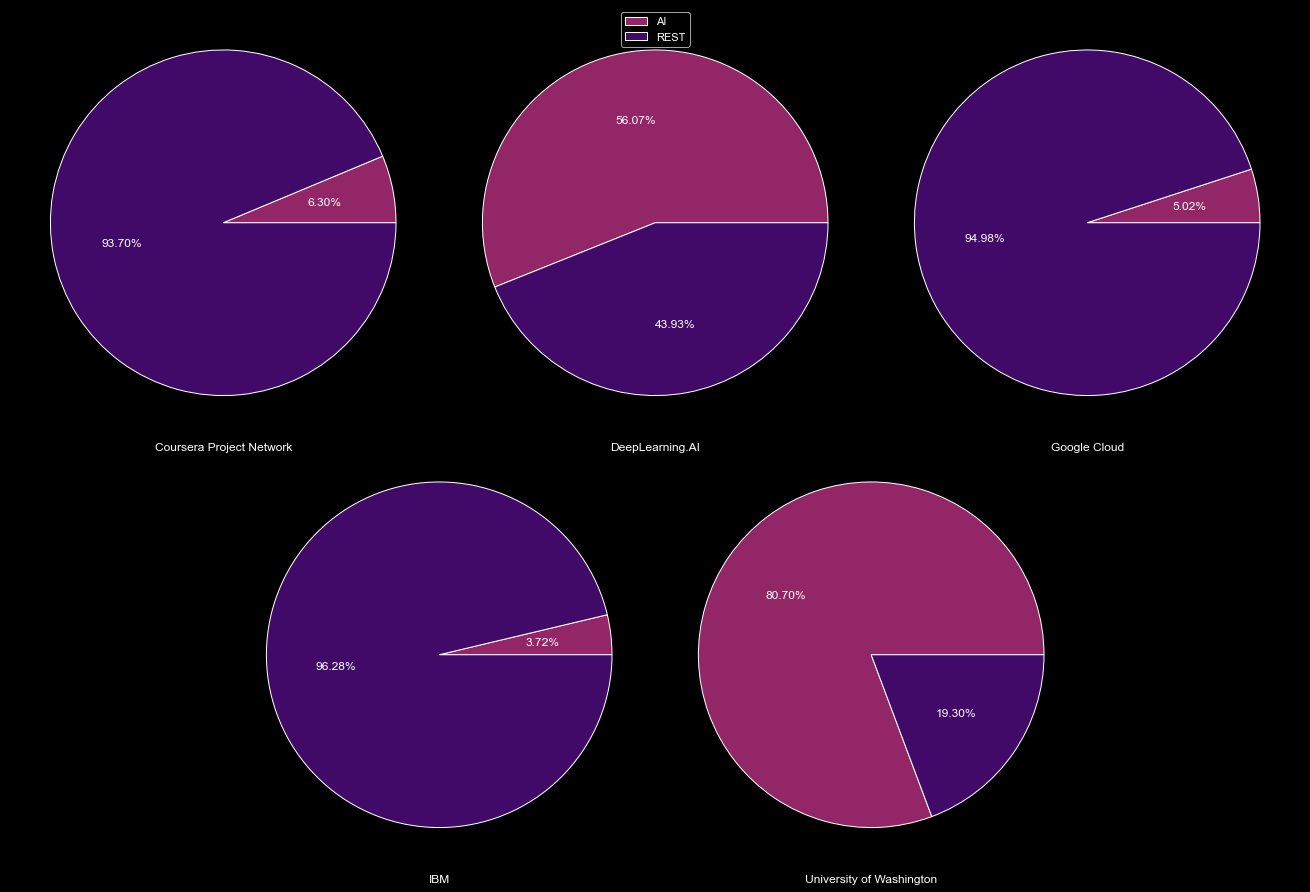

In [73]:
fig = plt.figure(figsize= (20, 20))

ax1 = fig.add_axes([0, 0.5, 0.3, 0.3])
ax2 = fig.add_axes([0.3, 0.5, 0.3, 0.3])
ax3 = fig.add_axes([0.6, 0.5, 0.3, 0.3])

ax4 = fig.add_axes([0.15, 0.2, 0.3, 0.3])
ax5 = fig.add_axes([0.45, 0.2, 0.3, 0.3])

for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.set(xticks= [], yticks= [])
    patches, _, __ = ax.pie(AI_vs_REST.iloc[idx], colors= get_color_spectrum(.6, .8, 2), autopct= "%.2f%%")
    ax.set_xlabel(AI_vs_REST.index[idx])
ax2.legend(patches, ["AI", "REST"], loc=9);

2 out of 5 universities have students more in their respective AI courses, than the other courses, while other 3 universities (which are also in top 5 for AI course - not to forget that) have surprisingly low amount of students in AI than their rest of their courses.

# 

# Q3. Top 50 courses which have got highest votes, are having which terms in their title?

In [4]:
import string
from nltk.corpus import stopwords
import re

In [5]:
puncs = string.punctuation
puncs

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [6]:
pattern = r'[!"#$%&\'()*+,-./:;<=>?@\[\]^_`{|}~]'

In [7]:
top50_terms = df.iloc[df.votes.sort_values(ascending= False).index][:50]

In [8]:
def remove(str_):
    return re.sub(pattern, '', str_)

In [9]:
top50_terms.course = top50_terms.course.apply(remove)

In [10]:
terms = top50_terms.course.str.lower().str.get_dummies(" ")

In [11]:
stopwords = stopwords.words("english")

In [12]:
stopwords.index("it")

26

In [13]:
stopwords.pop(26)

'it'

In [14]:
valids = terms.columns[~(terms.columns.str.lower().isin(stopwords))]

In [15]:
terms = terms.loc[:, valids]

In [16]:
most_used = terms.sum(axis= 0).sort_values(ascending= False)

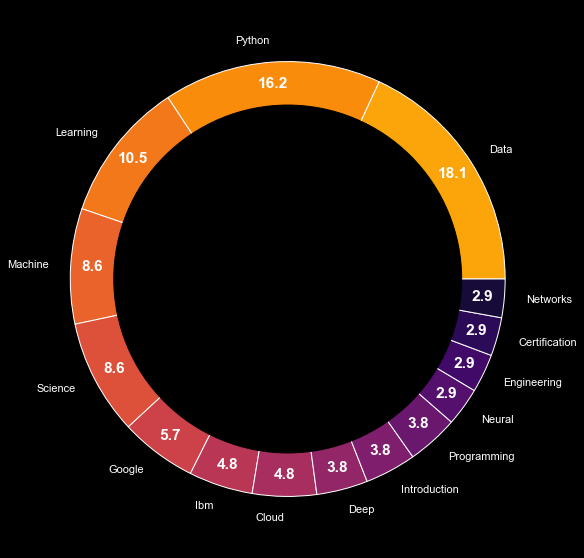

In [28]:
ax = plt.axes()
_, _, autopects = ax.pie(most_used[:15], colors= get_color_spectrum(.2, .9, 15), labels=most_used.index.str.title()[:15], 
       autopct= "%.1f", pctdistance=.9)
my_circle=plt.Circle( (0,0), 0.8, color='black')
plt.setp(autopects, **{'color':'white', 'weight':'bold', 'fontsize':15.5})

ax.add_artist(my_circle)

# 

## Q4. Top 3 courses (by number of students) from each difficulty.

In [35]:
df.difficulty.unique()

array(['Beginner', 'Intermediate', 'Mixed', 'Advanced', None],
      dtype=object)

In [195]:
Beginner = df[df.difficulty == 'Beginner'].sort_values(by= "students", ascending= False)[:3]
Beginner

,university,course,type,review,votes,students,difficulty
0,University of Michigan,Python for Everybody,SPECIALIZATION,4.8,225236.0,2400000.0,Beginner
381,Google,Google IT Support,PROFESSIONAL CERTIFICATE,4.8,99156.0,900000.0,Beginner
6,IBM,IBM Data Science,PROFESSIONAL CERTIFICATE,4.6,74747.0,830000.0,Beginner


In [196]:
Intermediate = df[df.difficulty == 'Intermediate'].sort_values(by= "students", ascending= False)[:3]
Intermediate

,university,course,type,review,votes,students,difficulty
22,DeepLearning.AI,Deep Learning,SPECIALIZATION,4.8,123216.0,1100000.0,Intermediate
423,DeepLearning.AI,Neural Networks and Deep Learning,COURSE,4.9,106332.0,960000.0,Intermediate
3,University of Michigan,Applied Data Science with Python,SPECIALIZATION,4.5,29358.0,730000.0,Intermediate


In [210]:
Mixed = df[df.difficulty == 'Mixed'].sort_values(by= "students", ascending= False)[:3].copy()
Mixed

,university,course,type,review,votes,students,difficulty
327,Stanford University,Machine Learning,COURSE,4.9,160251.0,4200000.0,Mixed
7,University of Michigan,Programming for Everybody (Getting Started wit...,COURSE,4.8,189604.0,2200000.0,Mixed
40,University of Michigan,Python Data Structures,COURSE,4.9,84054.0,750000.0,Mixed


In [215]:
Mixed.iloc[1, 1] = 'Programming for Everybody\n(Getting Started with Python)'

In [198]:
Advanced = df[df.difficulty == 'Advanced'].sort_values(by= "students", ascending= False)[:3]
Advanced

,university,course,type,review,votes,students,difficulty
339,HSE University,Advanced Machine Learning,SPECIALIZATION,4.4,3853.0,320000.0,Advanced
522,HSE University,Introduction to Deep Learning,COURSE,4.5,1774.0,160000.0,Advanced
31,IBM,Advanced Data Science with IBM,SPECIALIZATION,4.3,2705.0,110000.0,Advanced


In [106]:
import matplotlib.lines as line

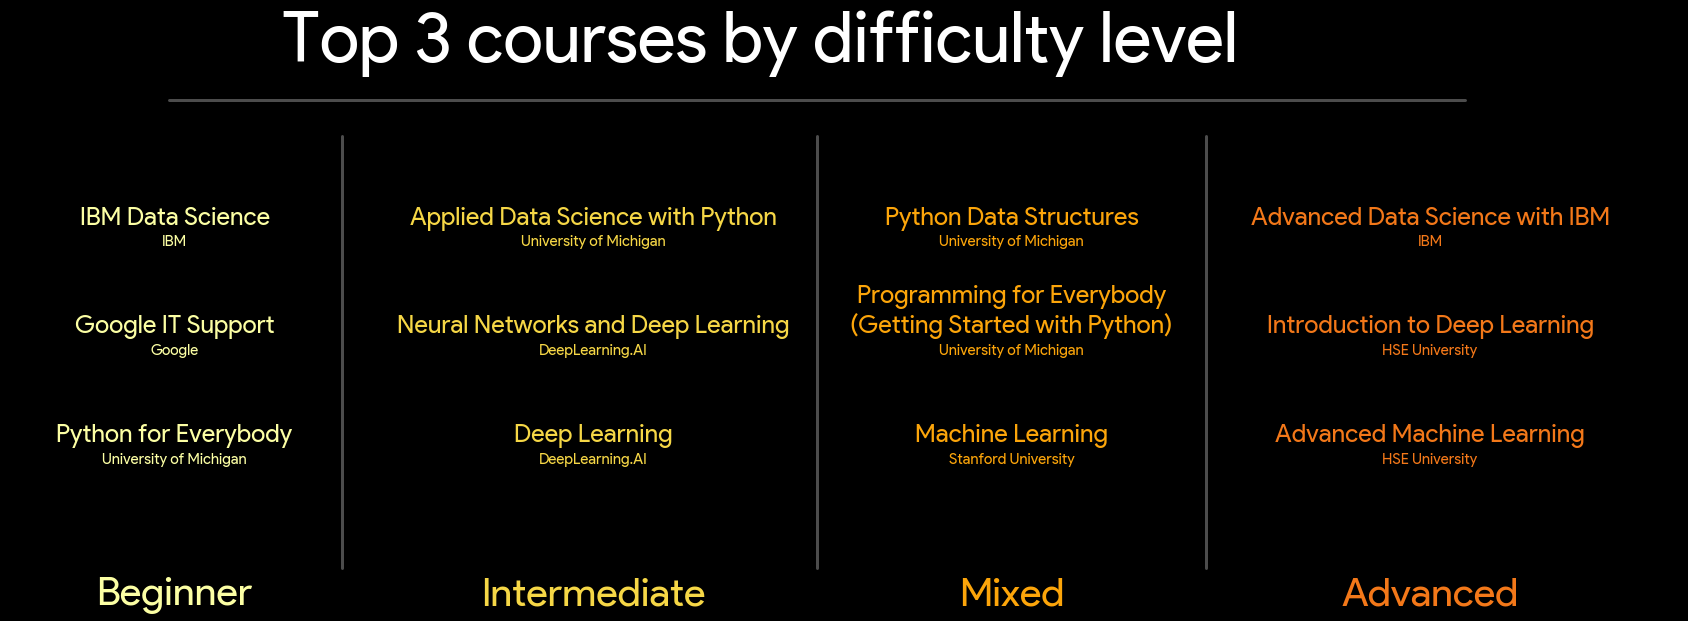

In [243]:
fig = plt.figure(figsize= (30, 10))
ax = plt.axes()
ax.set(xticks= [], yticks= [])
for side in ["left", 'right', 'bottom', 'top']:
    ax.spines[side].set_visible(False)

plt.text(0.45, 0.9, "Top 3 courses by difficulty level", ha= "center",
         fontfamily= "product sans", fontweight= 5, fontsize= 70)

l1 = line.Line2D([0.2, 0.8], [0.75, 0.75], transform=fig.transFigure, figure=fig, color = 'white', linestyle='-',linewidth = 3, alpha = 0.3)
fig.lines.extend([l1])


for course, x, color in zip(["Beginner", "Intermediate", "Mixed", "Advanced"], [0.1, 0.35, 0.60, 0.85], get_color_spectrum(0, .3, 4)):
    plt.text(x, -0.1, course, ha= "center",  fontfamily= "product sans", fontweight= 2, fontsize= 40, color= color)
    for row, ofset in zip(eval(course)[['course', 'university']].iterrows(), np.arange(0.2, 0.7, 0.2)):
        plt.text(x, ofset, row[1][0], ha= "center", fontfamily= "product sans", fontweight= 5, fontsize= 25, color= color)
        plt.text(x, ofset - 0.04, row[1][1], fontfamily= "product sans", fontweight= 5, fontsize= 15,  ha= "center", color= color)
        
l2 = line.Line2D([0.28, 0.28], [0.1, 0.70], transform=fig.transFigure, figure=fig, color = 'white', linestyle='-',linewidth = 3, alpha = 0.3)
l3 = line.Line2D([0.50, 0.50], [0.1, 0.70], transform=fig.transFigure, figure=fig, color = 'white', linestyle='-',linewidth = 3, alpha = 0.3)
l4 = line.Line2D([0.68, 0.68], [0.1, 0.70], transform=fig.transFigure, figure=fig, color = 'white', linestyle='-',linewidth = 3, alpha = 0.3)
fig.lines.extend([l2, l3, l4])

# 

# Q5. Universities review plot

In [280]:
tops = df.iloc[df.review.sort_values(ascending= False).index].copy()
tops.dropna(inplace= True)

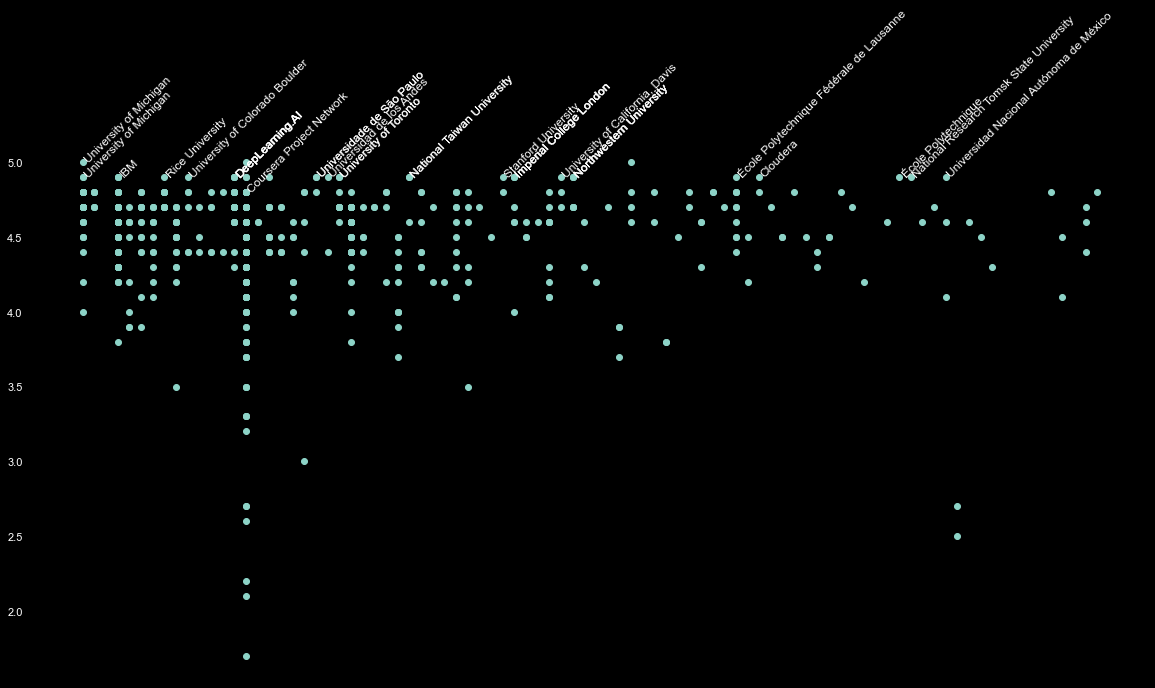

In [285]:
ax = plt.axes()
for side in ["left", 'right', 'bottom', 'top']:
    ax.spines[side].set_visible(False)

plt.scatter(df.university, df.review)
plt.xticks([]);
for u, r in zip(tops.university[:30], tops.review[:30]):
    plt.text(u, r, str(u), rotation= 45)

# 

<AxesSubplot:xlabel='difficulty', ylabel='type'>

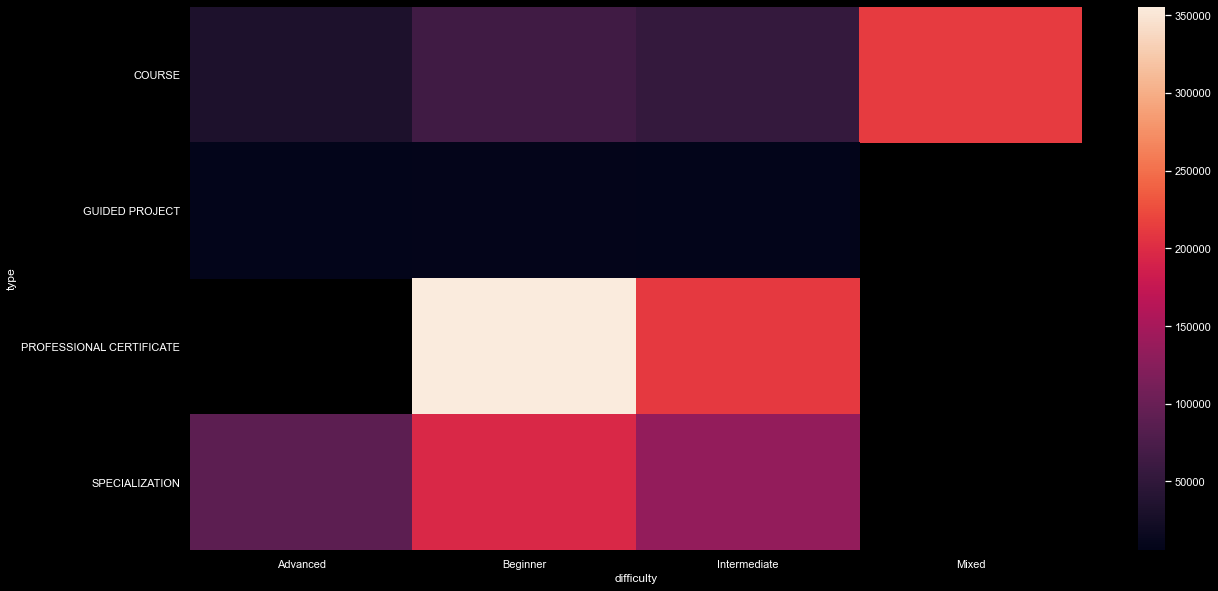

In [312]:
sns.heatmap(df.pivot_table(index= 'type', columns= 'difficulty', values= 'students'))

# 